In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

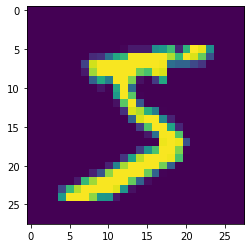

In [6]:
plt.imshow(X_train[0])

In [7]:
only_zeros = X_train[y_train == 0]

In [8]:
only_zeros.shape

(5923, 28, 28)

In [9]:
X_train.shape


(60000, 28, 28)

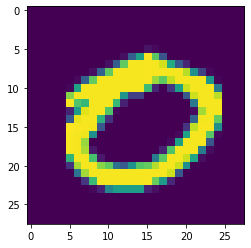

In [11]:
plt.imshow(only_zeros[14])

In [12]:
import tensorflow as  tf

In [14]:
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

In [17]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape = [28, 28]))
discriminator.add(Dense(150, activation = 'relu'))
discriminator.add(Dense(100, activation = 'relu'))

discriminator.add(Dense(1, activation = 'sigmoid'))
discriminator.compile(loss ='binary_crossentropy', optimizer = 'adam')

In [21]:
codings_size = 100
generator = Sequential()
generator.add(Dense(100, activation = 'relu', input_shape = [codings_size]))
generator.add(Dense(150, activation = 'relu'))
generator.add(Dense(784, activation = 'relu'))
generator.add(Reshape([28, 28]))


In [22]:
GAN = Sequential([generator, discriminator])

In [23]:
discriminator.trainable = False
GAN.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [24]:
batch_size = 32

In [27]:
my_data = only_zeros

In [28]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [29]:
dataset = dataset.batch(batch_size, drop_remainder=True)

In [30]:
epochs = 1

In [33]:
GAN.layers[0].summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 150)               15150     
_________________________________________________________________
dense_8 (Dense)              (None, 784)               118384    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [42]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f'Currently on epoch {epoch + 1}')
    i = 0
    for X_batch in dataset:
        i = i+1
        if i%100 == 0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")
        noise = tf.random.normal(shape=[batch_size, codings_size])
        gen_images = generator(noise)
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch, tf.float32)], axis = 0)
        y1 = tf.constant([[0.0]]*batch_size + [[1.0]] * batch_size)
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        #train gen phase
        noise = tf.random.normal(shape=[batch_size, codings_size])
        y2 = tf.constant([[1.0]] * batch_size)
        discriminator.trainable = False
        
        GAN.train_on_batch(noise,y2)
        

Currently on epoch 1
	 Currently on batch number 100 of 185


In [43]:
noise = tf.random.normal(shape=[10, codings_size])

In [44]:
noise.shape

TensorShape([10, 100])

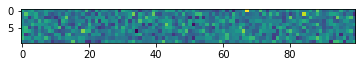

In [45]:
plt.imshow(noise)

In [46]:
images = generator(noise)

In [47]:
images.shape

TensorShape([10, 28, 28])

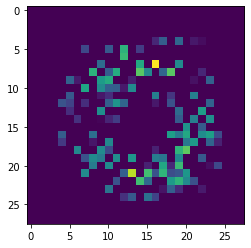

In [53]:
plt.imshow(images[8])